In [2]:
!pip install scikit-learn pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

housing  = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [21]:
# Load dataset into a dataframe
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df_target = pd.DataFrame(housing.target, columns=['MedHouseVal'])

# Print the dataset
print(df.shape)
print(df.head())
print(df.tail())

(20640, 8)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.1622

In [22]:
# Print the target variable
print(df_target.shape)
print(df_target.head())
print(df_target.tail())

(20640, 1)
   MedHouseVal
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
       MedHouseVal
20635        0.781
20636        0.771
20637        0.923
20638        0.847
20639        0.894


In [23]:
#Display for the dataset and check for missing values per features
display(df.describe())
display(df_target.describe())

mv = df.isnull().sum()
print('Missing values per feature:')
print(mv)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


Missing values per feature:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


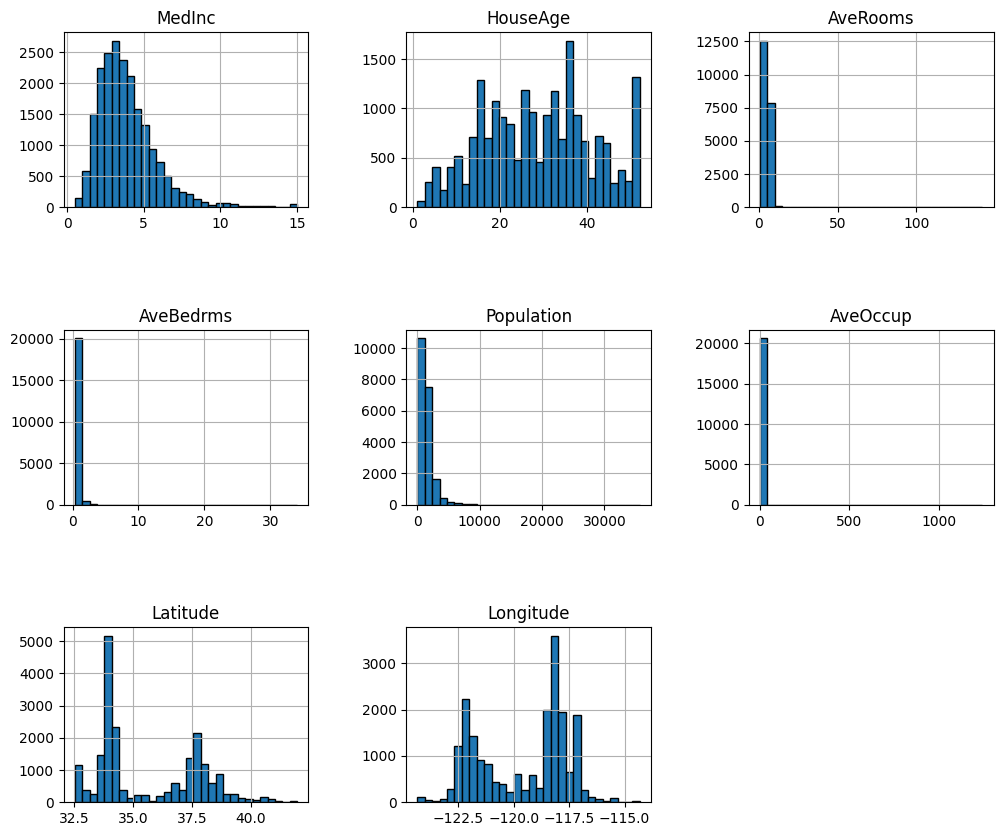

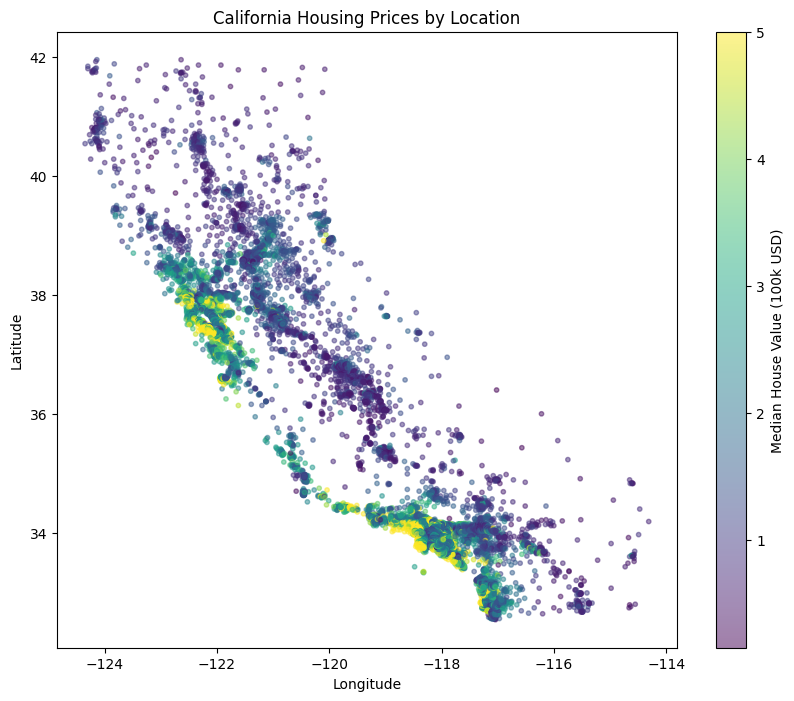

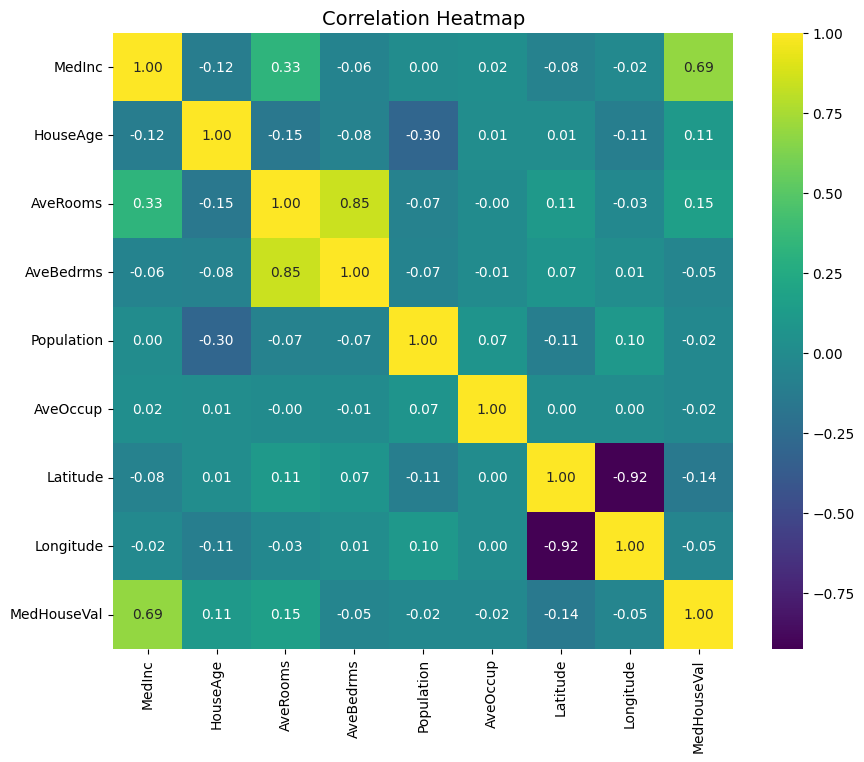

C:\Users\acotj\AppData\Local\Temp\ipykernel_2716\2885005533.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df["MedInc"], housing.target, alpha=0.3, s=10, cmap="viridis")


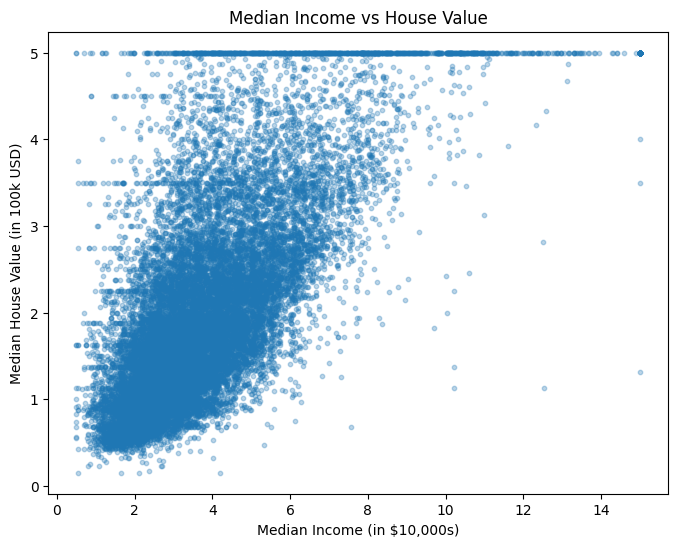

In [45]:
#Visualization for the dataset
feature_list = df.columns

df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

plt.figure(figsize=(10,8))
sc = plt.scatter(df["Longitude"], df["Latitude"], c=housing.target, cmap="viridis", alpha=0.5, s=10)
plt.colorbar(sc, label="Median House Value (100k USD)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Prices by Location")
plt.show()

plt.figure(figsize=(10,8))
corr = df.copy()
corr["MedHouseVal"] = housing.target
sns.heatmap(corr.corr(), annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


plt.figure(figsize=(8,6))
plt.scatter(df["MedInc"], housing.target, alpha=0.3, s=10, cmap="viridis")
plt.xlabel("Median Income (in $10,000s)")
plt.ylabel("Median House Value (in 100k USD)")
plt.title("Median Income vs House Value")
plt.show()
